In [13]:
import pandas as pd

In [14]:
# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\tause\Desktop\diwali sales\task 4\turkey_earthquake_tweets.csv')

In [15]:
# Display sample data
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1624185742552403969,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,Twitter for Android,0.0,0.0,False
1,1624155272179580928,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,Twitter Web App,0.0,0.0,False
2,1624144833647415325,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",Twitter for Android,0.0,0.0,False
3,1624123056372187143,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",Twitter for iPhone,0.0,0.0,False
4,1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False


In [16]:
import re
from textblob import TextBlob

In [18]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower().strip()
    return text

In [19]:
# Clean text data
df['clean_text'] = df['text'].apply(clean_text)

In [20]:
# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [21]:
df['sentiment'] = df['clean_text'].apply(get_sentiment)

In [22]:
# Classify sentiments into Positive, Negative, or Neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [23]:
df[['text', 'clean_text', 'sentiment', 'sentiment_label']].head()

,text,clean_text,sentiment,sentiment_label
0,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,hi simon as a fenerbahe supporter i did not he...,0.000000,Neutral
1,Hi People...any help here would be much apprec...,hi peopleany help here would be much appreciat...,0.266667,Positive
2,@JLo @intimissimi #TurkeyQuake we are in desp...,we are in desperate please help jennifer i lov...,-0.050000,Negative
3,thank you rafael this means a lot 😭😭😭💜 #Turkey...,thank you rafael this means a lot,0.000000,Neutral
4,@adgpi Hey @BBCWorld try to cover these storie...,hey try to cover these stories with absolute ...,0.200000,Positive


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\tause\AppData\Local\Temp\ipykernel_18160\241144100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis')


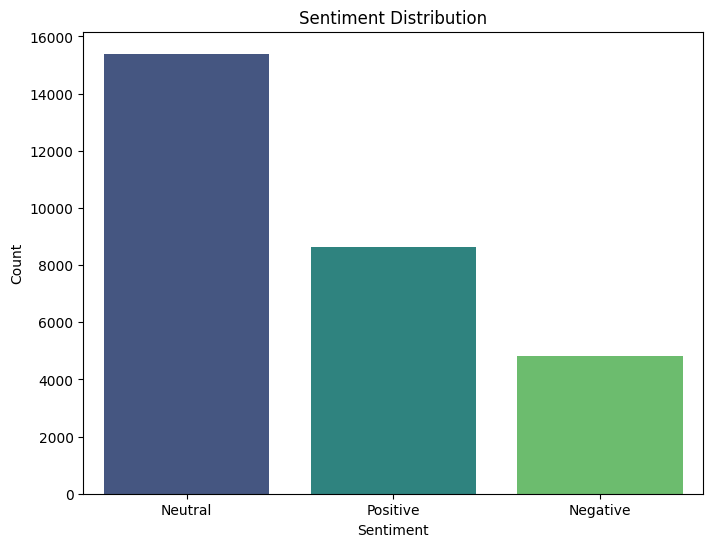

In [25]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


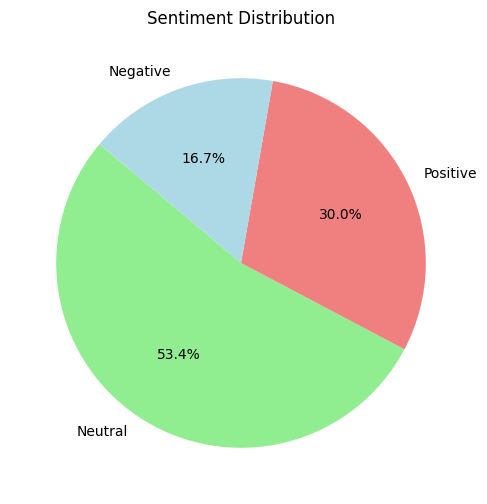

In [26]:
# Plot a pie chart for sentiment distribution
plt.figure(figsize=(8, 6))
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [27]:
from wordcloud import WordCloud

In [29]:

def plot_wordcloud(sentiment_label):
    sentiment_text = ' '.join(df[df['sentiment_label'] == sentiment_label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_label} Tweets')
    plt.show()


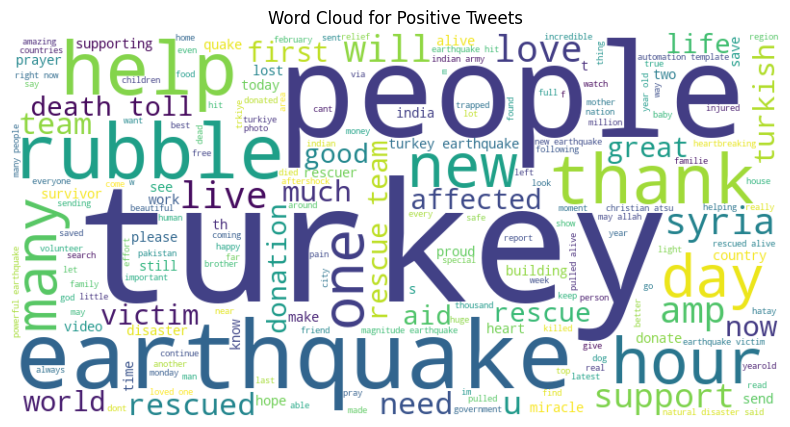

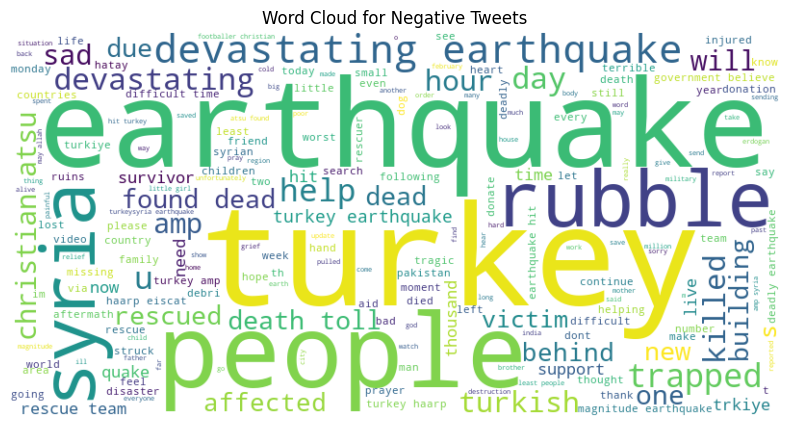

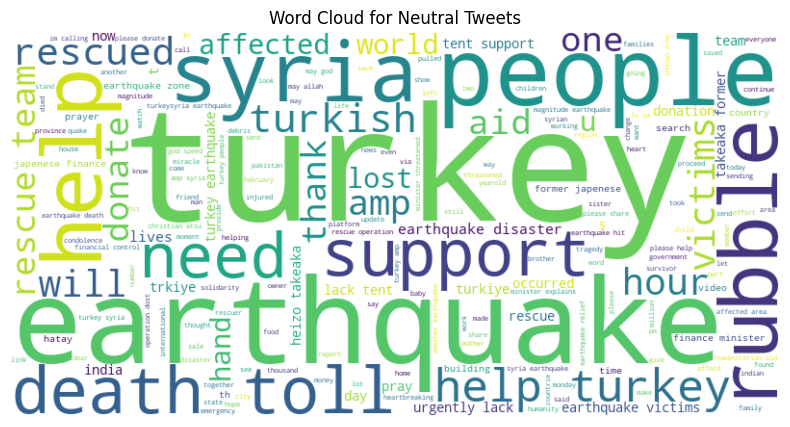

In [30]:
# Plot word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    plot_wordcloud(sentiment)


In [31]:
# Sentiment over time
df['date'] = pd.to_datetime(df['date'])
sentiment_trend = df.groupby([df['date'].dt.date, 'sentiment_label']).size().unstack(fill_value=0)

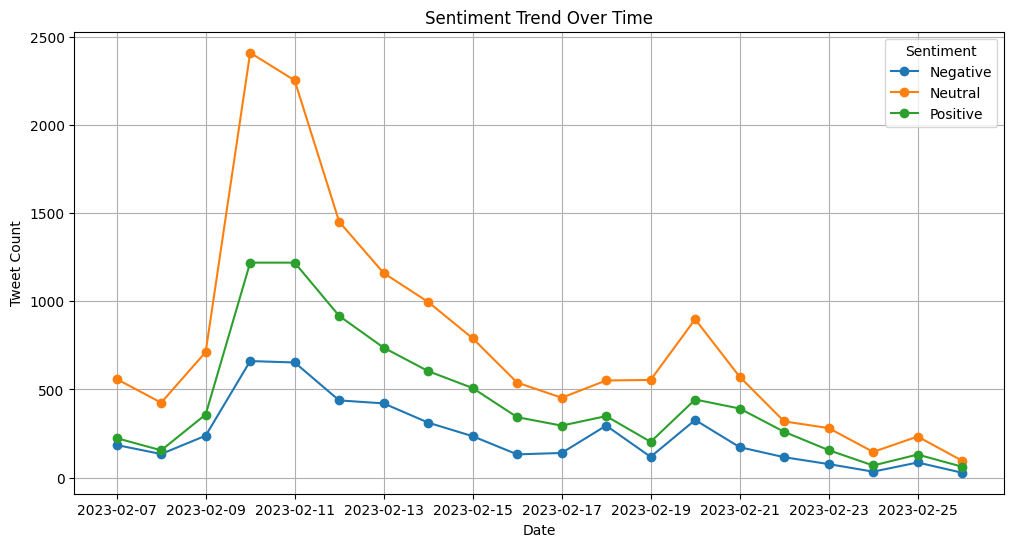

In [32]:
# Plot the sentiment trend
plt.figure(figsize=(12, 6))
sentiment_trend.plot(ax=plt.gca(), marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


In [33]:
from collections import Counter

In [34]:
# Extract and count hashtags for each sentiment
def extract_hashtags(hashtags_list):
    return [tag.lower() for sublist in hashtags_list for tag in sublist]

In [35]:

# Count hashtags
hashtag_data = pd.DataFrame({
    'Sentiment': df['sentiment_label'],
    'Hashtags': df['hashtags']
})
hashtag_data = hashtag_data.explode('Hashtags')

In [36]:
# Plot top hashtags for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    sentiment_hashtags = hashtag_data[hashtag_data['Sentiment'] == sentiment]['Hashtags'].dropna()
    common_hashtags = pd.DataFrame(Counter(sentiment_hashtags).most_common(10), columns=['Hashtag', 'Count'])

C:\Users\tause\AppData\Local\Temp\ipykernel_18160\1720343935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=common_hashtags, palette='viridis')


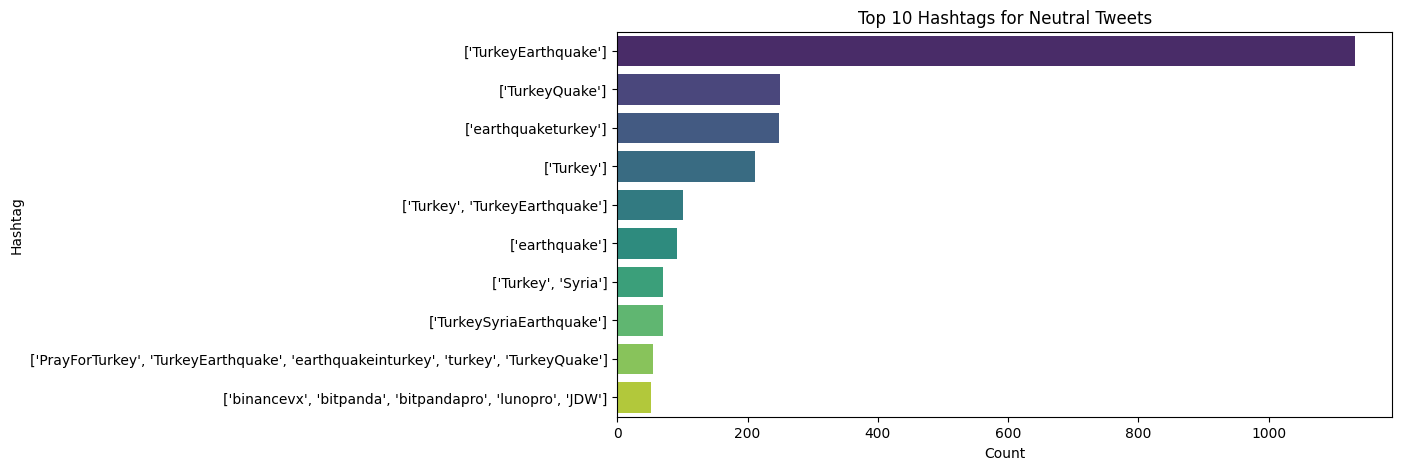

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Hashtag', data=common_hashtags, palette='viridis')
plt.title(f'Top 10 Hashtags for {sentiment} Tweets')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()


## Conclusion

### Sentiment Distribution:

A significant proportion of tweets expressed negative sentiment, reflecting distress, concern, and frustration.

There were also positive sentiment tweets, often offering prayers, support, and appreciation for rescue efforts.

Neutral sentiment tweets typically conveyed factual updates and information.

### Recommendations:

Authorities and NGOs can leverage sentiment analysis to track public concerns and identify areas requiring immediate support.

Media Monitoring can help in understanding the effectiveness of relief measures and crisis communication.